# Calibración de cámaras

Máster Universitario en Visión Artificial, URJC <br>
Visión Tridimensional 2021-22 <br>
Marzo de 2022

Luis ROSARIO TREMOULET

## Objetivos


Los objetivos de esta práctica son:
* Calibrar una cámara usando el método de calibración de Zhang, implementado en OpenCV.
* Hacer uso de los resultados de la calibración para tomar diferentes medidas en las imágenes.
* Calibrar una cámara a partir de una imagen de una escena en la que se desconoce las coordenadas de sus puntos.

## Requerimientos

Para esta práctica es necesario disponer del siguiente software:
* Python 3.X 
* Jupyter http://jupyter.org/.
* Las librerías científicas de Python: NumPy, SciPy, y Matplotlib.
* La librería OpenCV.

El material necesario para la práctica se puede descargar del Aula Virtual en la carpeta ``MaterialesPractica``. Esta
carpeta contiene:
* Una secuencia de imágenes tomadas con una cámara de móvil en alta resolución en el directorio ``template4``.
* Un conjunto de imágenes de un edificio tomadas con el mismo móvil y resolución, ``building``.

## 1. Calibración de una cámara

En esta parte se trabajará con la secuencia de imágenes del directorio ``template4``. Esta secuencia contiene una serie de imágenes de la plantilla de calibración. Para la calibración se debe tener en cuenta que el tamaño de cada escaque de la plantilla es de 21.5 mm en las direcciones X e Y.

In [1]:
# uncomment to show results in a window
# %matplotlib tk
import cv2
import glob
import copy
import numpy as np
import scipy.misc as scpm
import matplotlib.pyplot as ppl
import os

Implementa la función ``load_images(filenames)`` que reciba una lista de nombres de archivos de imagen
y las cargue como matrices de NumPy. Usa la función ``scipy.misc.imread`` para cargar las imágenes. La función
debe devolver una tupla con el primer elemento consistente en la lista de matrices de NumPy con las imágenes leídas y el segundo elemento la lista de nombres de fichero correspondientes.

In [2]:
# Error : 
# module 'scipy.misc' has no attribute 'imread'
# imread is deprecated! imread is deprecated in SciPy 1.0.0
# and will be removed in 1.2.0.
# Result : So i will use opencv to open

def load_images(filenames):
    files = []
    filenames_without_dir = []
    for filename in filenames:
        file = cv2.imread(filename)
        
        
#         w = int(file.shape[1] // 4)
#         h = int(file.shape[0] // 4)
        w = int(file.shape[1])
        h = int(file.shape[0])
        dim = (w, h)
#         file = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#         print('Resized Dimensions : ', file.shape)
        
        
        files.append(file)
        filenames_without_dir.append(os.path.basename(filename))
    return (files, filenames_without_dir)

Usa ``load_images`` para cargar todas las imágenes del directorio ``template4`` por orden alfabético (la función ``glob.glob`` permite generar la lista de nombres de archivo, y, por ejemplo, la función ``sorted()`` de Python ordena alfabéticamente una lista de cadenas de texto).

In [3]:
images = load_images(sorted(glob.glob('template4/*.jpg')))

##### Voy a comprobar que lo hice bien

IMG_20201019_141226.jpg


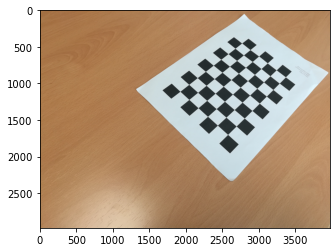

In [4]:
print(images[1][1])
ppl.figure()
ppl.imshow(cv2.cvtColor(images[0][1], cv2.COLOR_BGR2RGB))
ppl.show()

La función ``cv2.findChessboardCorners`` de
OpenCV busca la plantilla de calibración en una imagen y
devuelve una tupla de dos elementos. El primer elemento
es 0 si no consiguió detectar correctamente la plantilla, y
es 1 en caso contrario. El segundo elemento contiene las
coordenadas de las esquinas de la plantilla de calibración,
que sólo son válidas si la detección fue exitosa, es decir, si
el primer elemento de la tupla es 1.

**Ejercicio 1.** Usa la  función ``cv2.findChessboardCorners``, y opcionalmente ``cv2.cornerSubPix``, para detectar automáticamente el patrón de calibración y sus esquinas en todas las imágenes cargadas. El tamaño de la plantilla de calibración en las imágenes
de la práctica es (9, 6) (*columnas x filas*). Almacena los resultados de las múltiples llamadas en
una lista, de modo que el elemento i de dicha lista corresponda al resultado de ``cv2.findChessboardCorners``
para la imagen i cargada anteriormente.

In [5]:
chess_board_corners = []
corners = []

for i in images[0]:
    chess_board_corners.append(cv2.findChessboardCorners(i, (9,6)))

# Check that all corners where finded
check = True
for i, c in enumerate(chess_board_corners):
    corners.append(c[1])
    if c[0] == False:
        print("No corners found for : " + str(images[1][i]))
        check = False
if check:
    print("Succes ! All images have corners")

Succes ! All images have corners


In [6]:
# This section is OPTIONAL
# cornerSubPix is destructive. so we copy standard corners and use the new list to refine
corners2 = copy.deepcopy(corners)

# Refine corner estimation (images mus be in b&w, use cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) to convert from rgb)
# termination criteria (see, e.g https://docs.opencv.org/3.1.0/dc/dbb/tutorial_py_calibration.html)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
cornersRefined = []

for i, img in enumerate(images[0]):
    if chess_board_corners[i][0] == True:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        cornersRefined.append(cv2.cornerSubPix(gray, corners2[i], (11,11), (-1,-1), criteria))
    else:
        cornersRefined.append([])
    
print("Done !")

Done !


In [7]:
# Check len of cornersRefined (should be 28)

print(len(cornersRefined))

28


## RESUME

#### Corners = cornersRefined[]
#### Images in RGB = images[0]
#### image names = images[1]

El siguiente ejercicio consiste en dibujar sobre las imágenes los puntos detectados por ``cv.FindChessboardCorners``. Por motivos de eficiencia, la función empleada para hacerlo modifica directamente las imagen pasadas por parámetro en lugar de hacer una copia. Para evitar perder las imágenes originales es mejor realizar una copia de las mismas con antelación. Una forma de hacerlo es ``imgs2 = copy.deepcopy(imgs)``
donde ``imgs`` es la lista de imágenes cargadas. Utiliza estas imágenes copiadas en lugar de las
originales en el siguiente ejercicio.

**Ejercicio 2.** Usa ``cv2.drawChessboardCorners`` para dibujar las esquinas detectadas en el ejercicio anterior. Aplícalo a todas las imágenes que fueron correctamente detectadas. Ignora el resto.
Muestra alguna de las imágenes resultantes.

In [9]:
# We checked before for all draw chess board == True, so no need to pass


draw_images = copy.deepcopy(images[0])

for i in range(len(draw_images)):
    if chess_board_corners[i][0] == True:
        cv2.drawChessboardCorners(draw_images[i], (9, 6), cornersRefined[i], len(cornersRefined[i]))

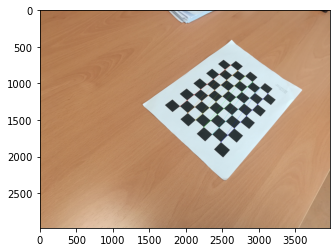

In [10]:
ppl.imshow(cv2.cvtColor(draw_images[0], cv2.COLOR_BGR2RGB))

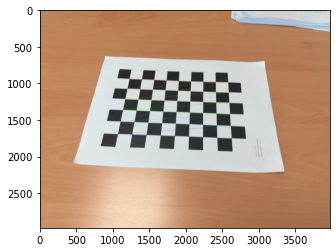

In [11]:
ppl.imshow(cv2.cvtColor(draw_images[17], cv2.COLOR_BGR2RGB))

##### No se puede ver muy bien el resultado de DrawChessBoardCroners, pero las líneas están ahí

Para calibrar la cámara, además de las coordenadas de
las esquinas en cada una de las imágenes, se necesitan las
coordenadas tridimensionales de las esquinas en el sistema
de referencia de la escena. Para esta práctica consideraremos que el centro del sistema de referencia, esto es, el
punto de coordenadas $[0, 0, 0]^\top$, es la primera esquina de
la plantilla de calibración detectada en todas las imágenes.
También consideraremos que el eje X corresponde al lado
corto de la plantilla de calibración, y el eje Y al lado largo.
Esta disposición implica que el eje Z apunta en la dirección
normal hacia arriba del plano de calibración.

Para el siguiente ejercicio es muy importante tener en
cuenta que las coordenadas de las esquinas en el sistema de
referencia de la escena deben darse en el mismo orden que
en el que fueron detectadas en cada una de las imágenes.

**Ejercicio 3.** Implementa la función ``get_chessboard_points(chessboard_shape, dx, dy)`` que genere una matriz de NumPy (es decir, un ndarray) de
tamaño $N × 3$ con las coordenadas $(x,y,z)$, resp. (*columna, fila, 0*),  de las esquinas de
la plantilla de calibración en el sistema de referencia de la
escena. $N$ es el número de esquinas de la plantilla.

``chessboard_shape`` es el número de puntos (*columnas, filas*) de la plantilla de calibración. Al igual que
en el Ejercicio 1, debe ser (9, 6). ``dx`` (resp. ``dy``) es el ancho
(resp. alto) de un escaque de la plantilla de calibración.
Para la plantilla utilizada en esta práctica, ambos valores
son 21.5 mm.

In [12]:
def get_chessboard_points(chessboard_shape, dx, dy):
    points = []
    for i in range(chessboard_shape[1]):
        for j in range(chessboard_shape[0]):
            points.append([i * dx, j * dy, 0])
   
    return np.array(points)

cb_points = get_chessboard_points((9, 6), 21.5, 21.5)
print(cb_points)

[[  0.    0.    0. ]
 [  0.   21.5   0. ]
 [  0.   43.    0. ]
 [  0.   64.5   0. ]
 [  0.   86.    0. ]
 [  0.  107.5   0. ]
 [  0.  129.    0. ]
 [  0.  150.5   0. ]
 [  0.  172.    0. ]
 [ 21.5   0.    0. ]
 [ 21.5  21.5   0. ]
 [ 21.5  43.    0. ]
 [ 21.5  64.5   0. ]
 [ 21.5  86.    0. ]
 [ 21.5 107.5   0. ]
 [ 21.5 129.    0. ]
 [ 21.5 150.5   0. ]
 [ 21.5 172.    0. ]
 [ 43.    0.    0. ]
 [ 43.   21.5   0. ]
 [ 43.   43.    0. ]
 [ 43.   64.5   0. ]
 [ 43.   86.    0. ]
 [ 43.  107.5   0. ]
 [ 43.  129.    0. ]
 [ 43.  150.5   0. ]
 [ 43.  172.    0. ]
 [ 64.5   0.    0. ]
 [ 64.5  21.5   0. ]
 [ 64.5  43.    0. ]
 [ 64.5  64.5   0. ]
 [ 64.5  86.    0. ]
 [ 64.5 107.5   0. ]
 [ 64.5 129.    0. ]
 [ 64.5 150.5   0. ]
 [ 64.5 172.    0. ]
 [ 86.    0.    0. ]
 [ 86.   21.5   0. ]
 [ 86.   43.    0. ]
 [ 86.   64.5   0. ]
 [ 86.   86.    0. ]
 [ 86.  107.5   0. ]
 [ 86.  129.    0. ]
 [ 86.  150.5   0. ]
 [ 86.  172.    0. ]
 [107.5   0.    0. ]
 [107.5  21.5   0. ]
 [107.5  43. 

**Ejercicio 4.** Calibra la cámara usando la lista de resultados de ``cv2.findChessboardCorners`` y el conjunto de puntos del modelo dados por ``get_chessboard_points``, del ejercicio anterior. 

In [13]:
print(len(cornersRefined[0]))

54


In [14]:
print(len(images[0]))

28


In [15]:
def remove_images_with_bad_corners(corners, images):
    tmp_images = []
    tmp_corners = []
    for i, c in enumerate(corners):
        if len(c) == 0:
            print("Corner " + str(i) + " not valid, removed !")
        else:
            tmp_corners.append(c)
            tmp_images.append([images[0][i], images[1][i]])
    return tmp_corners, tmp_images

In [16]:
# Points = cb_points[]
# Corners = cornersRefined[]

# Extract the list of valid images with all corners
valid_corners, new_images = remove_images_with_bad_corners(cornersRefined, images)
num_valid_images = len(valid_corners)

print("Size of valid corners : " + str(num_valid_images) + " should be the same as image : " + str(len(new_images)))
print("List of all valid images :")
for i in new_images : print("\t" + str(i[1]))

# Prepare input data 
# object_points: numpy array with dimensions (number_of_images, number_of_points, 3)
object_points = []
for _ in range(num_valid_images) : object_points.append(cb_points)
object_points = np.array(object_points, dtype=np.float32)

print("Lenghts : " + str(len(object_points)) + " " + str(len(object_points[0])) + " " + str(len(object_points[0][0]))) 

# image_points: numpy array with dimensions (number_of_images, number_of_points, 2)
# valid_corners should have same size has nb_of_images
image_points = []
for vc in valid_corners : image_points.append(np.squeeze(np.array(vc, dtype=np.float32)))
print("Lenghts : " + str(len(image_points)) + " " + str(len(image_points[0])) + " " + str(len(image_points[0][0]))) 

# Calibrate for square pixels corners standard
# Found here : https://www.programcreek.com/python/example/89320/cv2.calibrateCamera
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(
    object_points,
    image_points,
    (new_images[0][0].shape[0], new_images[0][0].shape[1]),
    None,
    None,
    flags=cv2.CALIB_FIX_ASPECT_RATIO)

print("Corners standard intrinsics:\n",intrinsics)
print("Corners standerd dist_coefs:", dist_coeffs)
print("rms:", rms)

Size of valid corners : 28 should be the same as image : 28
List of all valid images :
	IMG_20201019_141223.jpg
	IMG_20201019_141226.jpg
	IMG_20201019_141227_1.jpg
	IMG_20201019_141228_1.jpg
	IMG_20201019_141229_1.jpg
	IMG_20201019_141230_1.jpg
	IMG_20201019_141231_1.jpg
	IMG_20201019_141232_1.jpg
	IMG_20201019_141233_1.jpg
	IMG_20201019_141234.jpg
	IMG_20201019_141234_2.jpg
	IMG_20201019_141235_1.jpg
	IMG_20201019_141236_1.jpg
	IMG_20201019_141237_1.jpg
	IMG_20201019_141238_1.jpg
	IMG_20201019_141239_1.jpg
	IMG_20201019_141240_1.jpg
	IMG_20201019_141241.jpg
	IMG_20201019_141242.jpg
	IMG_20201019_141242_2.jpg
	IMG_20201019_141244.jpg
	IMG_20201019_141245.jpg
	IMG_20201019_141246.jpg
	IMG_20201019_141247.jpg
	IMG_20201019_141248_1.jpg
	IMG_20201019_141249_1.jpg
	IMG_20201019_141250.jpg
	IMG_20201019_141251_1.jpg
Lenghts : 28 54 3
Lenghts : 28 54 2
Corners standard intrinsics:
 [[3.19998949e+03 0.00000000e+00 1.97733219e+03]
 [0.00000000e+00 3.19998949e+03 1.45301331e+03]
 [0.00000000e+0

Presta atención al parámetro de salida ``rms`` ¿qué significa este parámetro? ¿Se obtiene un valor razonable? ¿Qué pasa con el ``rms`` y la matriz de intrínsecos ``K`` si calibramos con las mismas imágenes pero con un tamaño de 1/4 del ancho y del alto? 

## Respuesta

#### Qué significa este parámetro ?

Es el error de reproyección (Root mean square, rms), ofrece una buena estimación de la
exactitud de los parámetros encontrados.

Más es cercano a cero y mas la calibración de la camára es buena.

Como podemos ver en los graficos de la imagen de abajo (imagen tambien disponible en el proyecto : zhang.png),
este error depende del ruido en las imagenes utilizadas (fig 1.) y del numero de imagenes utilizadas (fig 2.)


#### Se obtiene un valor razonable ?

Aqui obtenemos un error de 1.87, por lo cual es un valor razonable.

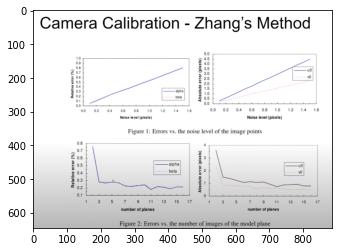

In [17]:
ppl.imshow(cv2.cvtColor(cv2.imread("images/zhang.png"), cv2.COLOR_BGR2RGB))

#### Tamaño de 1/4 ?

Para probar con las imagenes con un tamaño de 1/4 hay que descomentar las lineas del bloque 2 (función load_images())

Al reducir el tamaño de las images de 1/4 el rms pasa a 0.44 (4,25 menos que con el tamaño original),

###### Matriz intresecos (tamaño 1/4):
 
 [[1.57844896e+03 0.00000000e+00 5.42527553e+02]
 
 [0.00000000e+00 1.57844896e+03 1.43022187e+02]
 
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
 
###### Matriz intresecos (tamaño origininal):
 
 [[3.19998949e+03 0.00000000e+00 1.97733219e+03]
 
 [0.00000000e+00 3.19998949e+03 1.45301331e+03]
 
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Podemos ver quel valor de la focal (igual en X y Y porque aquí los pixeles son cuadrados) también disminuye del 50%.


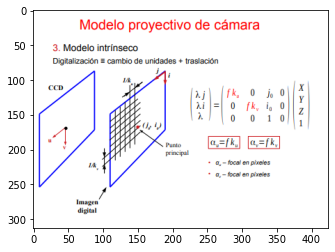

In [18]:
ppl.imshow(cv2.cvtColor(cv2.imread("images/intrinsecos.png"), cv2.COLOR_BGR2RGB))

**Ejercicio 5.** Implementa una función ``plotCamera3D(K, rvec, tvec, axes)`` que dibuje los ejes del sistema de referencia de la escena en 3D, el centro óptico de la cámara como un punto 3D y los ejes del sistema de referencia de la cámara expresados en el de la escena. A esta función se le pasan los intrínsecos (matriz $3x3$), y los extrínsecos: el vector de rotación ``rvec`` ($3x1$), y el vector de traslación ``tvec`` ($3x1$). El parámetro ``axes`` son los ejes de matplotlib configurados para dibujar en 3D. 

###### Sólo quiero probar si el resultado es bueno ---> plotImageAxes() He utilizado el mismo método que en la clase

In [19]:
def plotImageAxes(K, R, t):
    points = np.array([
                     [0, 0, 0, 1],
                     [90, 0, 0, 1],
                     [0, 0, 0, 1],
                     [0, 90, 0, 1],
                     [0, 0, 0, 1],
                     [0, 0, 90, 1]
    ])
    points = points.T
    P = K @ np.hstack((R, t))
    points = P @ points
    points /= points[2, :]

    ppl.plot(points[0, 0:2], points[1, 0:2], 'r-', linewidth=3)
    ppl.plot(points[0, 2:4], points[1, 2:4], 'g-', linewidth=3)
    ppl.plot(points[0, 4:6], points[1, 4:6], 'b-', linewidth=3)

Ortonomal ?
 [[ 1.00000000e+00  1.47253170e-16 -1.71990442e-17]
 [ 1.47253170e-16  1.00000000e+00 -3.55619425e-17]
 [-1.71990442e-17 -3.55619425e-17  1.00000000e+00]]
K
 [[3.19998949e+03 0.00000000e+00 1.97733219e+03]
 [0.00000000e+00 3.19998949e+03 1.45301331e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
R
 [[-0.87640895  0.48113694  0.0203619 ]
 [ 0.47148425  0.86589805 -0.16710229]
 [-0.09803041 -0.13684962 -0.98572928]]
t
 [[   3.97398274]
 [-126.24011753]
 [ 466.31208265]]


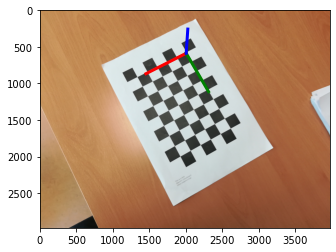

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# You can change index
image_index = 12

ppl.show()
ppl.figure()
R, _ = cv2.Rodrigues(rvecs[image_index])

print("Ortonomal ?\n",R @ R.T)

plotImageAxes(intrinsics, R, tvecs[image_index])
ppl.imshow(cv2.cvtColor(images[0][image_index], cv2.COLOR_BGR2RGB))

print("K\n", intrinsics)
print("R\n", R)
print("t\n", tvecs[image_index])

In [22]:
def plot3DPoints(Pts, axes):
    
    x = Pts[:, 0]
    y = Pts[:, 1]
    z = Pts[:, 2]
    axes.scatter3D(x, y, z, 'k')    
    

def plotCamera3D(K, rvec, tvec, axes=None, first_loop=True):
    
    if axes is None:
            axes = ppl.axes(projection = '3d')
        
# Para poder mover el punto de vista en la ventana 3D interactivamente, hay que descomentar "%matplotlib tk" 
# habrá que usar axes.scatter3d y/o axes.plot3d

#     Scene origin

#   first_loop is here to avoid drawing the scene origin n times
    if first_loop:
        length = 90
        start_0 = 0
    
    
        points_default_3D = np.array([
                         [0, 0, 0, 1],
                         [0, 0, 0, 1],
                         [length, 0, 0, 1],
                         [0, 0, 0, 1],
                         [0, 0, 0, 1],
                         [0, length, 0, 1],
                         [0, 0, 0, 1],
                         [0, 0, 0, 1],
                         [0, 0, length, 1]
                    ])
    
        points_default_2D = np.array([
                         [0, 0, 0, 1],
                         [length, 0, 0, 1],
                         [0, 0, 0, 1],
                         [0, length, 0, 1],
                         [0, 0, 0, 1],
                         [0, 0, length, 1]
        ])

        points_3D = points_default_3D.T
        points_2D = points_default_2D.T
    
#     I had trouble understanding how to draw in 3D with matplotlib so I tried several examples (all working)
#     Stack Overflow that helped me : https://stackoverflow.com/questions/58722910/how-to-draw-simle-3d-axis-in-python3
    
#     METHOD 1
        axes.plot3D(points_3D[0, 0:3], points_3D[1, 0:3], points_3D[2, 0:3], 'r-', linewidth=3)
        axes.plot3D(points_3D[0, 3:6], points_3D[1, 3:6], points_3D[2, 3:6], 'g-', linewidth=3)
        axes.plot3D(points_3D[0, 6:9], points_3D[1, 6:9], points_3D[2, 6:9], 'b-', linewidth=3)
    
#     METHOD 2
#         axes.plot3D([0, 0, length], [0, 0, 0], [0, 0, 0], 'r-', linewidth=3)
#         axes.plot3D([0, 0, 0], [0, 0, length], [0, 0, 0], 'g-', linewidth=3)
#         axes.plot3D([0, 0, 0], [0, 0, 0], [0, 0, length], 'b-', linewidth=3)

#     METHOD 3
#   How it works : axes.plot([x_start, x_end], [y_start, y_end], [z_start, z_end])
#         axes.plot([0, length], [0, 0], [0, 0], color='b')
#         axes.plot([0, 0], [0, length], [0, 0], color='g')
#         axes.plot([0, 0], [0, 0], [0, length], color='r')
    
#     METHOD 4
#         axes.plot(points_2D[0, 0:2], points_2D[1, 0:2], points_2D[2, 0:2], 'r-', linewidth=3)
#         axes.plot(points_2D[0, 2:4], points_2D[1, 2:4], points_2D[2, 2:4], 'g-', linewidth=3)
#         axes.plot(points_2D[0, 4:6], points_2D[1, 4:6], points_2D[2, 4:6], 'b-', linewidth=3)
    
#     METHOD Bonus (if you want to draw arrows and not only lines)
#         axes.quiver(start_0, 0, 0, length, 0, 0, length=1, arrow_length_ratio=0.5, color='r', linewidth=2)
#         axes.quiver(0, start_0, 0, 0, length, 0, length=1, arrow_length_ratio=0.5, color='g', linewidth=2)
#         axes.quiver(0, 0, start_0, 0, 0, length, length=1, arrow_length_ratio=0.5, color='b', linewidth=2)



#     CAMARAS

    R, _ = cv2.Rodrigues(rvec)
    R @ R.T
    print("Ortonomal ?\n",R @ R.T)
    
    C = - R.T @ tvec
    lenght = 25
    
    camera_points = np.array([[0, 0, 0, 1],   # origen
                            [lenght, 0, 0, 1],  # Punto en eje X 
                            [0, lenght, 0, 1],  # Punto en eje Y
                            [0, 0, lenght, 1]]) # Punto en eje Z
    
    camera_points = camera_points.T
    
#     Camera to scene
    
    x_scene = R.T @ (np.array([camera_points[0:3, 1]]).T - tvec)
    y_scene = R.T @ (np.array([camera_points[0:3, 2]]).T - tvec)
    z_scene = R.T @ (np.array([camera_points[0:3, 3]]).T - tvec)
    
    axes.plot3D([C[0][0], x_scene[0][0]], [C[1][0], x_scene[1][0]], [C[2][0], x_scene[2][0]], 'r')
    axes.plot3D([C[0][0], y_scene[0][0]], [C[1][0], y_scene[1][0]], [C[2][0], y_scene[2][0]], 'g')
    axes.plot3D([C[0][0], z_scene[0][0]], [C[1][0], z_scene[1][0]], [C[2][0], z_scene[2][0]], 'b')
    axes.scatter3D(C[0], C[1], C[2])

Ortonomal ?
 [[ 1.00000000e+00  3.46313829e-17 -2.62081228e-17]
 [ 3.46313829e-17  1.00000000e+00  3.28521235e-17]
 [-2.62081228e-17  3.28521235e-17  1.00000000e+00]]


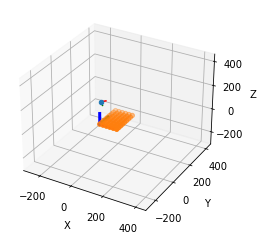

In [30]:
# %matplotlib tk
# from mpl_toolkits.mplot3d import Axes3D

# Cambiar para una imagen de calibración diferente
image_index = 0
ppl.figure()
axes = ppl.axes(projection='3d')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')
plotCamera3D(intrinsics, rvecs[image_index], tvecs[image_index], axes)
plot3DPoints(cb_points, axes) # pintar esquinas del "ajedrez" en 3D

# Importante para que los ejes 3D tengan las mismas proporciones en matplotlib
scaling = np.array([getattr(axes, 'get_{}lim'.format(dim))() for dim in 'xyz']); axes.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)

# Mostrar resultados en 3D
ppl.show()

# Done above
# ppl.figure()
# ppl.imshow(cv2.cvtColor(images[0][image_index], cv2.COLOR_BGR2RGB))

Usando la función desarrollada, ``plotCamera3D``, pintar en 3D los ejes del sistema de referencia de la escena, los puntos de la plantilla de calibración y todas las cámaras que tomaron las imágenes en ``template4``.

0
Ortonomal ?
 [[ 1.00000000e+00  3.46313829e-17 -2.62081228e-17]
 [ 3.46313829e-17  1.00000000e+00  3.28521235e-17]
 [-2.62081228e-17  3.28521235e-17  1.00000000e+00]]
1
Ortonomal ?
 [[ 1.00000000e+00 -8.40516751e-17 -5.28820808e-18]
 [-8.40516751e-17  1.00000000e+00 -3.67816993e-17]
 [-5.28820808e-18 -3.67816993e-17  1.00000000e+00]]
2
Ortonomal ?
 [[ 1.00000000e+00 -2.26815209e-17  9.40034970e-18]
 [-2.26815209e-17  1.00000000e+00 -6.20889555e-17]
 [ 9.40034970e-18 -6.20889555e-17  1.00000000e+00]]
3
Ortonomal ?
 [[ 1.00000000e+00  3.72752078e-16 -3.58137937e-17]
 [ 3.72752078e-16  1.00000000e+00 -4.22062179e-17]
 [-3.58137937e-17 -4.22062179e-17  1.00000000e+00]]
4
Ortonomal ?
 [[ 1.00000000e+00  3.74039023e-16  1.94856188e-18]
 [ 3.74039023e-16  1.00000000e+00 -3.04901305e-17]
 [ 1.94856188e-18 -3.04901305e-17  1.00000000e+00]]
5
Ortonomal ?
 [[ 1.00000000e+00 -2.20831534e-16  7.77872293e-17]
 [-2.20831534e-16  1.00000000e+00  1.06524617e-16]
 [ 7.77872293e-17  1.06524617e-16  1.0

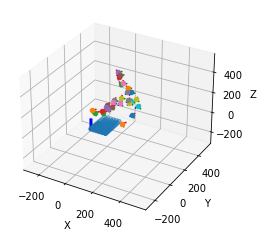

In [27]:
ppl.figure()
axes = ppl.axes(projection='3d')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')
plot3DPoints(cb_points, axes) # pintar esquinas del "ajedrez" en 3D

for i in range(len(rvecs)):
    print(i)
    if i == 0:
        plotCamera3D(intrinsics, rvecs[i], tvecs[i], axes)
    else:
        plotCamera3D(intrinsics, rvecs[i], tvecs[i], axes, False)

scaling = np.array([getattr(axes, 'get_{}lim'.format(dim))() for dim in 'xyz']); axes.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)
ppl.show()

### El resultado (imagen) esta al final del print !

###  1.1 Parámetros intrínsecos

Una de las características intrínsecas de una cámara más fácilmente comprensible es su ángulo de visión o campo
de visión (FOV), o el campo de visión de cualquier región en ella. El campo de visión es la amplitud angular de una
determinada escena y se suele expresar en grados. 

**Ejercicio 6.** Conociendo los intrínsecos K y el tamaño en píxeles de la imagen, calcula el ángulo de visión horizontal de la cámara (el relacionado con el ancho de la imagen).


Resuelve en primer lugar el ejercicio analíticamente y, posteriormente, implementa dicha respuesta y calcula un resultado numérico.

## Respuesta

In [31]:
# We have this information :

print("K\n", intrinsics)
print("Size of image : ", images[0][0].shape)

# Helped by class and : https://stackoverflow.com/questions/39992968/how-to-calculate-field-of-view-of-the-camera-from-camera-intrinsic-matrix

K
 [[3.19998949e+03 0.00000000e+00 1.97733219e+03]
 [0.00000000e+00 3.19998949e+03 1.45301331e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Size of image :  (2976, 3968, 3)


##### Teniendo en cuenta que la matriz intrínseca K es :

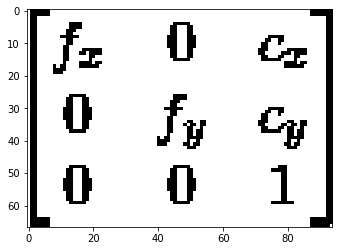

In [32]:
ppl.imshow(cv2.cvtColor(cv2.imread("images/intr.png"), cv2.COLOR_BGR2RGB))

##### Podemos calcular la fov en x e y así :
w -> ancho de la imagen

h -> altura de la imagen

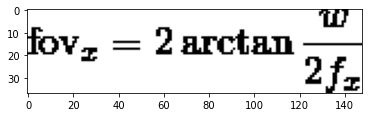

In [33]:
ppl.imshow(cv2.cvtColor(cv2.imread("images/fov.png"), cv2.COLOR_BGR2RGB))

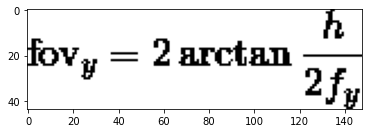

In [34]:
ppl.imshow(cv2.cvtColor(cv2.imread("images/fov2.png"), cv2.COLOR_BGR2RGB))

In [35]:
w = images[0][0].shape[1]
h = images[0][0].shape[0]
fx = intrinsics[0][0]
fy = intrinsics[1][1]

print("w : ", w)
print("h : ", h)
print("fx : ", fx)
print("fy : ", fy)

fov_x = 2 * np.arctan(w/(2*fx)) * 180 / np.pi

fov_y = 2 * np.arctan(h/(2*fy)) * 180 / np.pi

print("fov_x : ", fov_x)
print("fov_y : ", fov_y)

w :  3968
h :  2976
fx :  3199.989492772296
fy :  3199.989492772296
fov_x :  63.59799415713154
fov_y :  49.876999167912345


###### El ángulo de visión horizontal de la cámara es igual a 63,56°.

**Ejercicio 7.** Conociendo los intrínsecos K y que la región tiene forma rectangular, su esquina superior izquierda está en la posición (10,10) y tiene un tamaño de (35,35) píxeles, calcula el ángulo de visión diagonal que abarca dicha región.


Resuelve en primer lugar el ejercicio analíticamente y, posteriormente, implementa dicha respuesta y calcula un resultado numérico.

## Respuesta

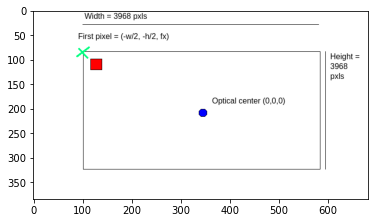

In [36]:
ppl.imshow(cv2.cvtColor(cv2.imread("images/square.png"), cv2.COLOR_BGR2RGB))

Ejemplo de los pasos con los píxeles superior derecho e inferior izquierdo

Paso 1) Tomaremos como referencia el centro óptico de la cámara (0, 0, 0)

Paso 2) Calcular las coordenadas del punto superior derecho del rectángulo respecto al centro óptico

Paso 3) Calcular las coordenadas del punto inferior izquierdo del rectángulo respecto al centro óptico

Paso 4) Calcular el vector entre el punto superior derecho y el centro óptico (denominado u)

Paso 5) Calcular el vector entre el punto inferior izquierdo y el centro óptico (denominado v)

Paso 6) Calcular el ángulo entre el vector u y v con numpy

In [37]:
def get_angle(x1, y1, x2, y2):

    # Step 1
    optical_center = np.array([0, 0, 0])
    
    # Knowing that the camera is placed in the "middle" of the image
    x_image_0 = optical_center[0] - w / 2
    y_image_0 = optical_center[1] - h / 2

    # Step 2
    x1 += x_image_0
    y1 += y_image_0

    # Step 3
    x2 += x_image_0
    y2 += y_image_0

    # Step 4
    u = np.array([x1, y1, fx])

    # Step 5
    v = np.array([x2, y2, fx])

    # Step 6
    inner = np.inner(u, v)
    norms = np.linalg.norm(u) * np.linalg.norm(v)

    cos = inner / norms
    rad = np.arccos(np.clip(cos, -1.0, 1.0))
    deg = np.rad2deg(rad)
    
    return deg

print(f"Angle between (10, 10) and (45, 45) : {get_angle(10, 10, 10 + 35, 10 + 35)}°")
print(f"Angle between (45, 10) and (10, 45) : {get_angle(10 + 35, 10, 10, 10 + 35)}°")

Angle between (10, 10) and (45, 45) : 0.5635219690015646°
Angle between (45, 10) and (10, 45) : 0.7019011858538452°


**Ejercicio 8.** En las imágenes tomadas por dispositivos digitales se almacena información sobre la cámara que tomó la foto en un formato denominado [EXIF](https://es.wikipedia.org/wiki/Exchangeable_image_file_format). Esta información se puede leer con programas de retoque fotográfico libres como [GIMP](https://www.gimp.org/downloads/).

Dados los intrísecos en K del proceso de calibración, y sabiendo que el móvil que tomó la foto es un modelo Honor 6X con un sensor Sony IMX368 calcular la focal en mm de la cámara a partir de K. Se pide comparar el resultado con la información EXIF de las imágenes.


Resuelve en primer lugar el ejercicio analíticamente y, posteriormente, implementa dicha respuesta y calcula un resultado numérico.

## Respuesta

Gracias a GIMP podemos ver que la distancia focal utilizada tiene un valor de 3,8mm (imagen de a bajo).

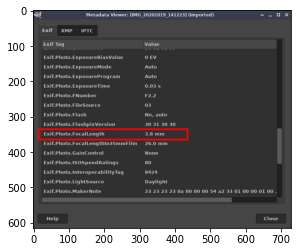

In [38]:
ppl.imshow(cv2.cvtColor(cv2.imread("images/gimp.png"), cv2.COLOR_BGR2RGB))

Tenemos : 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; focal en pixeles (fx)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; tamaño de la imagen en pixeles (w y h)
           
Podemos obtener :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; tamaño del la imagen en el sensor (tamaño del sensor) en mm
           
Queremos :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; focal en mm

Si encontramos el tamaño del sensor podremos aplicar una regla de tres entre esas variables deberiamos poder obtener la focal en mm

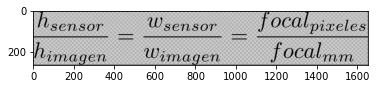

In [39]:
ppl.imshow(cv2.cvtColor(cv2.imread("images/focal.png"), cv2.COLOR_BGR2RGB))

Tamaño del sensor Sony IMX368 = 1.25 micras [Info](https://www.movilzona.es/moviles/xiaomi/xiaomi-mi-5x/)

Ahora sabemos que cada lado de un pixel mide 1.25⁻³ mm

In [40]:
Focal = fx * 0.000125

print(f"La focal tiene un tamaño de {Focal:.2f}mm")

La focal tiene un tamaño de 0.40mm


**Ejercicio 9.** Calcula cuánto se ha trasladado la cámara entre las imágenes ``IMG_20201019_141223.jpg``  y ``IMG_20201019_141235_1.jpg``.

Resuelve en primer lugar el ejercicio analíticamente y, posteriormente, implementa dicha respuesta y calcula un resultado numérico.

## Respuesta

Tenemos : 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vector de translation para cada imagen

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vector de rotation
           
Podemos obtener :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; matriz de rotation (con Rodriguez)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; coordenadas de los centros opticos dependiendo de la escena C = -R.T @ t
           
Queremos :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; distancia entre los centros opticos de las 2 imagenes

Si encontramos las coordenadas de los centros opticos (coordenada de la camara a un instante t) para cada imagen solo necesitaremos calcular la distancia entre la diferencia de los 2 vectores (las coordenadas tambien son vectores porque empiezan desde el mismo punto).



Imagen :  0


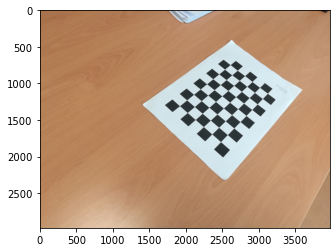

Imagen :  11


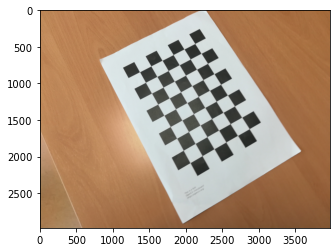

In [41]:
for i, img in enumerate(zip(images[0], images[1])):
    if img[1] == "IMG_20201019_141223.jpg":
        image1 = img[0]
        index1 = i
    if img[1] == "IMG_20201019_141235_1.jpg":
        image2 = img[0]
        index2 = i
        
ppl.show()
ppl.figure()
print("Imagen : ", index1)
ppl.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
ppl.show()
ppl.figure()
ppl.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
print("Imagen : ", index2)

In [42]:
t1 = tvecs[index1]
t2 = tvecs[index2]

R1, _ = cv2.Rodrigues(rvecs[index1])
R2, _ = cv2.Rodrigues(rvecs[index2]) 

C1 = - R1.T @ t1
C2 = - R2.T @ t2


# Normalmente son iguales
print(np.linalg.norm(C1))
print(np.linalg.norm(t1))

# Normalmente son iguales
print(np.linalg.norm(C2))
print(np.linalg.norm(t2))

dist = np.linalg.norm(C1 - C2)
print(f"\nDistancia entre las 2 imagenes : {dist / 10:.2f}cm")

471.23263235021403
471.23263235021403
429.3483630090094
429.34836300900935

Distancia entre las 2 imagenes : 40.86cm
